# IC Coding Etiquette and Excel Reporting Part 1

## 01. Importing Libraries
## 02. Importing Data
## 03. PII (Personally Identifiable Information) Consideration
## 04. Comparing Customer Behavior in Different Geographic Regions
## 05.Visualizations for Labels and Flags## 06. Creating a Low-Activity Exclusion Flag
## 07. Exporting Charts and Data

## --

## 01. Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data

In [2]:
#Assigning path for import
path = r'C:\Users\Mosspants\Desktop\CareerFoundry\A4_Python_Fundamentals_for_Data_Analysts\Instacart Basket Analysis_10_2023'

In [3]:
#Importing orders_products_all
ords_prods = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_all.pkl'))

In [4]:
#Checking import with head()
ords_prods.head()

,user_id,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,order_day_of_week,...,prices,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,average_days_since_prior_order,frequency_flag
0,26711,Missouri,48,1/1/2017,3,married,165665,2543867,5.0,1.0,...,9.0,Mid-range product,Busiest Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer
1,26711,Missouri,48,1/1/2017,3,married,165665,1285508,7.0,5.0,...,9.0,Mid-range product,Regular Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer
2,26711,Missouri,48,1/1/2017,3,married,165665,2578584,8.0,1.0,...,9.0,Mid-range product,Busiest Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer
3,26711,Missouri,48,1/1/2017,3,married,165665,423547,2.0,2.0,...,12.6,Mid-range product,Regular Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer
4,26711,Missouri,48,1/1/2017,3,married,165665,2524893,3.0,3.0,...,12.6,Mid-range product,Slowest Days,Most Orders,8.0,New Customer,12.6,High Spender,30.0,Non-frequent Customer


In [5]:
#Checking import with shape
ords_prods.shape

(32435059, 29)

## 03. PII (Personally Identifiable Information) Consideration

### The original data included first and last names, which are PII (Personally Identifiable Information). These columns were originally removed because they did not contribute to the analysis, but were also addressed due to data security.

## 04. Comparing Customer Behavior in Different Geographic Regions

### Creating a 'region' column based on 'state'.

In [ ]:
#Looking at names and counts of states
ords_prods['state'].value_counts(dropna = False).sort_index()

### Based on Wikipedia article, list of regions will be:
### Northeast: Maine, New Hampshire, Vermont, Massachusetts, Rhode Island, Connecticut, New York, Pennsylvania, New Jersey
### Midwest: Wisconsin, Michigan, Illinois, Indiana, Ohio, North Dakota, South Dakota, Nebraska, Kansas, Minnesota, Iowa, Missouri
### South: Delaware, Maryland, District of Columbia, Virginia, West Virginia, North Carolina, South Carolina, Georgia, Florida, Kentucky, Tennessee, Mississippi, Alabama, Oklahoma, Texas, Arkansas, Louisiana
### West: Idaho, Montana, Wyoming, Nevada, Utah, Colorado, Arizona, New Mexico, Alaska, Washington, Oregon, California, Hawaii

In [ ]:
#Creating Northeast Region condition
ords_prods.loc[(ords_prods['state'] == 'Maine') | (ords_prods['state'] == 'New Hampshire') | (ords_prods['state'] == 'Vermont') | (ords_prods['state'] == 'Massachusetts') | (ords_prods['state'] == 'Rhode Island') | (ords_prods['state'] == 'Connecticut') | (ords_prods['state'] == 'New York') | (ords_prods['state'] == 'Pennsylvania') | (ords_prods['state'] == 'New Jersey'), 'region'] = 'Northeast'

In [ ]:
#Creating Midwest Region condition
ords_prods.loc[(ords_prods['state'] == 'Wisconsin') | (ords_prods['state'] == 'Michigan') | (ords_prods['state'] == 'Illinois') | (ords_prods['state'] == 'Indiana') | (ords_prods['state'] == 'Ohio') | (ords_prods['state'] == 'North Dakota') | (ords_prods['state'] == 'South Dakota') | (ords_prods['state'] == 'Nebraska') | (ords_prods['state'] == 'Kansas') | (ords_prods['state'] == 'Minnesota') | (ords_prods['state'] == 'Iowa') | (ords_prods['state'] == 'Missouri'), 'region'] = 'Midwest'

In [ ]:
#Creating South Region condition
ords_prods.loc[(ords_prods['state'] == 'Delaware') | (ords_prods['state'] == 'Maryland') | (ords_prods['state'] == 'District of Columbia') | (ords_prods['state'] == 'Virginia') | (ords_prods['state'] == 'West Virginia') | (ords_prods['state'] == 'North Carolina') | (ords_prods['state'] == 'South Carolina') | (ords_prods['state'] == 'Georgia') | (ords_prods['state'] == 'Florida') | (ords_prods['state'] == 'Kentucky') | (ords_prods['state'] == 'Tennessee') | (ords_prods['state'] == 'Mississippi') | (ords_prods['state'] == 'Alabama') | (ords_prods['state'] == 'Oklahoma') | (ords_prods['state'] == 'Texas') | (ords_prods['state'] == 'Arkansas') | (ords_prods['state'] == 'Louisiana'), 'region'] = 'South'

In [ ]:
#Creating West Region condition
ords_prods.loc[(ords_prods['state'] == 'Idaho') | (ords_prods['state'] == 'Montana') | (ords_prods['state'] == 'Wyoming') | (ords_prods['state'] == 'Nevada') | (ords_prods['state'] == 'Utah') | (ords_prods['state'] == 'Colorado') | (ords_prods['state'] == 'Arizona') | (ords_prods['state'] == 'New Mexico') | (ords_prods['state'] == 'Alaska') | (ords_prods['state'] == 'Washington') | (ords_prods['state'] == 'Oregon') | (ords_prods['state'] == 'California') | (ords_prods['state'] == 'Hawaii'), 'region'] = 'West'

In [ ]:
#Checking output of region column
ords_prods['region'].value_counts(dropna = False)

In [ ]:
ords_prods['region'].shape

### Creating crosstab of spending habits based on regions.

In [ ]:
#Creating a crosstab of spending_flag and region
region_crosstab = pd.crosstab(ords_prods['spending_flag'], ords_prods['region'], dropna = False)

In [ ]:
#Checking output of crosstab
region_crosstab

In [ ]:
#Copying crosstab to clipboard for pasting in Excel
region_crosstab.to_clipboard()

### The South region contains the most customers and the most amount of High Spenders. 99.91% of customers in this region are High Spenders. This region also contained the most number of states.
### In the next largest region, West region, 99.90% of customers are High Spenders.
### The Midwest region also has 99.90% of High Spenders.
### The lowest customer count region is the Northeast. 99.90% of customers in this region are High Spenders. This region also contained the least amount of states.
### Based on the similar amount of High Spenders to Low Spenders in each region, I would say that there is no differences in the spending habbits based on region. Each region has an amount of High Spenders that makes up 99% of their total customer count.

In [ ]:
#Frequency bar chart of new region variable
region_bar = ords_prods['region'].value_counts().sort_index().plot.bar()
plt.title('Region Count')
plt.xlabel('Region')
plt.ylabel('Number of Customers (In Ten Millions)')

### Crosstab of region and loyalty_flag.

In [ ]:
#Creating a crosstab of loyalty_flag and region
region_loyalty_crosstab = pd.crosstab(ords_prods['loyalty_flag'], ords_prods['region'], dropna = False)

In [ ]:
#Checking output of crosstab
region_loyalty_crosstab

In [ ]:
#Copying crosstab to clipboard for pasting in Excel
region_loyalty_crosstab.to_clipboard()

In [ ]:
#Count of loyalty_flag for comparison
ords_prods['loyalty_flag'].value_counts(dropna = False).sort_index()

## 05.Visualizations for Labels and Flags

### Frequency_flag bar chart.

Text(0, 0.5, 'Number of Customers (In Ten Millions)')

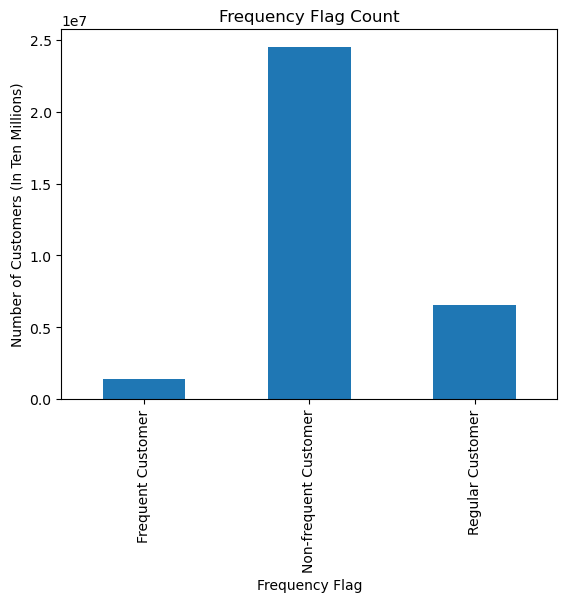

In [12]:
#Frequency_flag bar chart
frequency_bar = ords_prods['frequency_flag'].value_counts().sort_index().plot.bar()
plt.title('Frequency Flag Count')
plt.xlabel('Frequency Flag')
plt.ylabel('Number of Customers (In Ten Millions)')

### Spending_flag bar chart.

Text(0, 0.5, 'Number of Customers (In Ten Millions)')

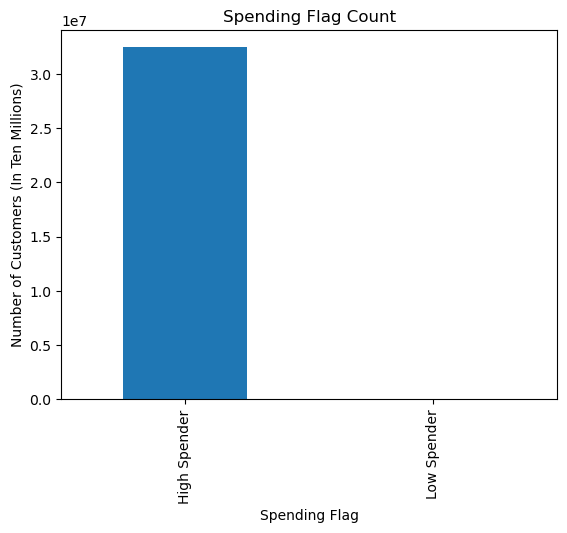

In [11]:
#Spending_flag bar chart
spending_bar = ords_prods['spending_flag'].value_counts().sort_index().plot.bar()
plt.title('Spending Flag Count')
plt.xlabel('Spending Flag')
plt.ylabel('Number of Customers (In Ten Millions)')

## 06. Creating a Low-Activity Exclusion Flag

### Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [ ]:
#Creating condtion for low-activity, less than 5 orders
ords_prods.loc[ords_prods['max_order'] < 5, 'exclusion_flag'] = 'Low-activity'

In [ ]:
#Creating condtion for regular-activity, greater than or equal to 5 orders
ords_prods.loc[ords_prods['max_order'] >= 5, 'exclusion_flag'] = 'Regular-activity'

In [ ]:
#Checking output of new exclusion_flag column
ords_prods['exclusion_flag'].value_counts(dropna = False)

In [ ]:
ords_prods['exclusion_flag'].shape

### Creating subset without low-activity customers.

In [ ]:
#Creating subset of data with only regular-activity customers
ords_prods_reg = ords_prods[ords_prods['exclusion_flag'] == 'Regular-activity']

In [ ]:
#Checking new subset
ords_prods_reg['exclusion_flag'].value_counts(dropna = False)

In [ ]:
ords_prods_reg.head()

In [ ]:
ords_prods_reg.shape

## 07. Exporting Charts and Data

In [ ]:
#Exporting region bar chart
region_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'region_bar.png' ))

In [13]:
#Exporting frequency_flag bar chart
frequency_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'frequency_bar.png' ))

In [14]:
#Exporting spending_flag bar chart
spending_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'spending_bar.png' ))

In [ ]:
#Exporting orders_products_all with new region column
ords_prods.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_all_region.pkl'))

In [ ]:
#Exporting orders_products_all without low-activity customers
ords_prods_reg.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_all_regular.pkl'))